In [5]:
import json 

In [6]:
with open('./testexportcoco.json', 'r') as file_handle:
        label_data = json.loads(file_handle.read())
        #print (label_data['categories'])
        #print (label_data['annotations'])
        #print (label_data.keys()) 

In [7]:
result = {}
for annotation in label_data['annotations']:
    #if annotation['image_id'] == 'cju17cowo0s7y0855vzvtq8da':
       # print(annotation)
    if  annotation['image_id'] not in result:
        result[annotation['image_id']]  = {1:0,2:0,3:0}
    result[annotation['image_id']][annotation['category_id']] += annotation['area']
#print (result)

                           vesicle      root  arbuscle  colonization range
cju17cowo0s7y0855vzvtq8da  10155.0  290304.0       0.0            0.034981
cju17tbnr0su40878mrxq49nz  13201.0  270160.0       0.0            0.048864
cju17z93urapc08351n0d2qk7  25314.0  282624.0       0.0            0.089568
cju18icidrzu509882ue6cacb   9801.0  264192.0    5852.0            0.059249
cju19k5z0srad0988drc3nm0g   9698.0  293376.0   13051.0            0.077542
cju1a0ck12pg00799eke3h6bn  14969.0  281088.0   12930.0            0.099254
cju1a5je5sud30835oky6st2e   9745.0  340992.0    2337.0            0.035432
cju1ciqzsqhwp0993auwjm9n6  15632.0  153600.0    3034.0            0.121523
cju1t7dif2m4q08358hmm1byb  23555.0  192000.0    1353.0            0.129729
cju1tcxofce1e0878y7c5tosh  11379.0  294912.0    5728.0            0.058007
cju8h85yhw6vl0817quzra18h   5447.0  308736.0   10512.0            0.051691
cjub0nmbogi3s081840uua18m   2028.0  297984.0   10579.0            0.042308
cjub0q9b9g9k109873sqw3q7k

ValueError: supplied range of [0.0008697542944118286, inf] is not finite

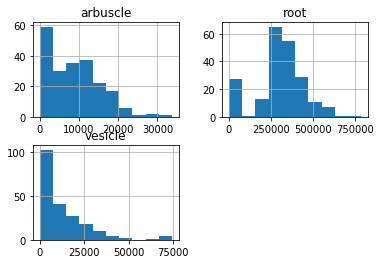

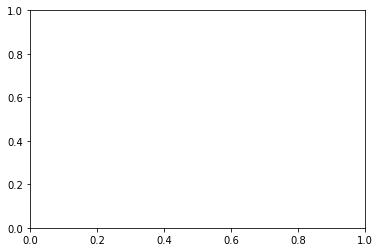

In [39]:
import pandas as pd


df = pd.DataFrame.from_dict(result, orient='index' )
df.columns  = ['vesicle','root','arbuscle']
df ['colonization range'] = (df.arbuscle + df.vesicle) / df.root

print (df)
df[['vesicle','root','arbuscle']].hist()
df = df[(df[['colonization range']] != 0).all(axis=1)]
#print(df['colonization range'])
df[['colonization range']].hist()
#df = df.replace(0, np.nan)
#df = df.dropna(how='all', axis=0)
#df = df.replace(np.nan, 0)
#df.loc[(df!=0).any(axis=1)]